## Proyecto Final
### Hugo Villanueva
#### Ciencia de Datos en Python
#### Postgrado en análisis y predicción de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Separación de datos

In [2]:
main_data = np.load('proyecto_training_data.npy')

In [3]:
np.shape(main_data)#hallar la dimensión de la matriz

(1460, 6)

In [4]:
rownum = int(np.shape(main_data)[0]*0.8)# para hallar el número de filas para las varibles de entrenamiento


In [5]:
training_data = main_data[0:rownum] # Variables entrenamiento
test_data = main_data[rownum:] # Variables prueba

### Análisis exploratorio

In [6]:
caracteristicas = ['y:Precio de venta', 'x_1:Calidad', 'x_2:Área primer piso', 'x_3:Total de cuartos', 'x_4:Año de construcción', 'x_5:Largo Fachada']

In [7]:
for lon in range(6):
    print('Media',caracteristicas[lon],'=',np.nanmean(training_data[:,lon]))
    print('Valor Máximo',caracteristicas[lon],'=',np.nanmax(training_data[:,lon]))
    print('Valor Minimo',caracteristicas[lon],'=',np.nanmin(training_data[:,lon]))
    print('Rango',caracteristicas[lon],'=',(np.nanmax(training_data[:,lon])-np.nanmin(training_data[:,lon])))
    print('Desviación estandar',caracteristicas[lon],'=',np.nanstd(training_data[:,lon]),'\n')
    
    

Media y:Precio de venta = 180590.27739726027
Valor Máximo y:Precio de venta = 755000.0
Valor Minimo y:Precio de venta = 34900.0
Rango y:Precio de venta = 720100.0
Desviación estandar y:Precio de venta = 78781.95108033362 

Media x_1:Calidad = 6.101027397260274
Valor Máximo x_1:Calidad = 10.0
Valor Minimo x_1:Calidad = 1.0
Rango x_1:Calidad = 9.0
Desviación estandar x_1:Calidad = 1.377435193240741 

Media x_2:Área primer piso = 1156.3236301369864
Valor Máximo x_2:Área primer piso = 3228.0
Valor Minimo x_2:Área primer piso = 334.0
Rango x_2:Área primer piso = 2894.0
Desviación estandar x_2:Área primer piso = 373.620331503586 

Media x_3:Total de cuartos = 6.4854452054794525
Valor Máximo x_3:Total de cuartos = 14.0
Valor Minimo x_3:Total de cuartos = 2.0
Rango x_3:Total de cuartos = 12.0
Desviación estandar x_3:Total de cuartos = 1.6084517167387253 

Media x_4:Año de construcción = 1971.451198630137
Valor Máximo x_4:Año de construcción = 2010.0
Valor Minimo x_4:Año de construcción = 1875.

### Histogramas

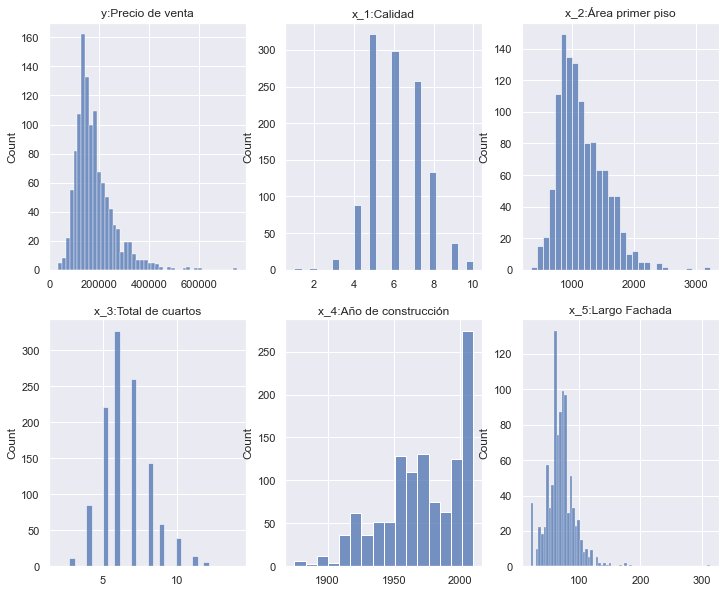

In [30]:
fig = plt.figure(figsize=(12, 10))
sns.set()
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.title(caracteristicas[i-1])
    sns.histplot(training_data[:,i-1])




### Correlación entre catecterísticas y precios de venta

In [9]:
x_training_data = training_data[:,1:]
y_training_data = training_data[:rownum+1,0]
x_test_data = test_data[:,1:]
y_test_data = test_data[:rownum+1,0]
y_test_data.shape
# separando variables independientes de las dependientes, se agrego dimensinalidad en las filas de y training
#debido a que para calcular el coeficiente de correlación se debe tener la misma dimensión

(292,)

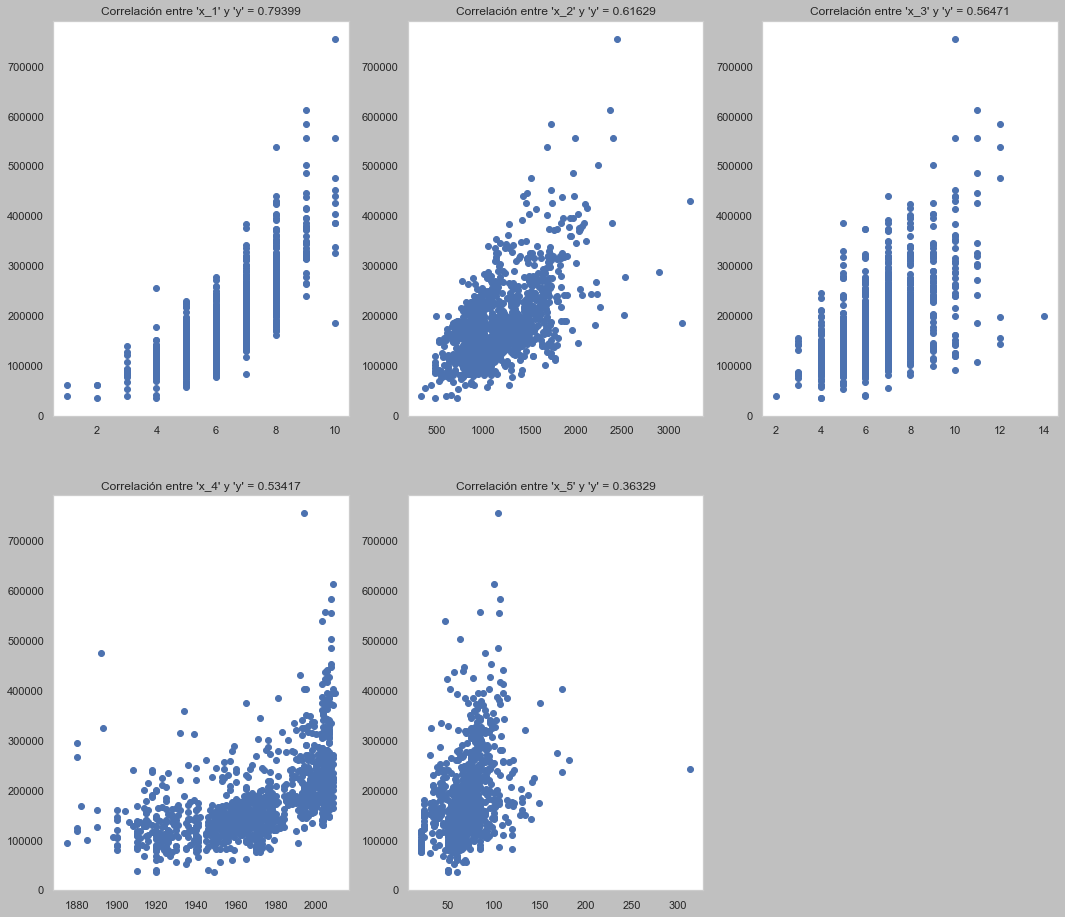

In [10]:
fig = plt.figure(figsize=(18, 16),facecolor='silver')
sns.set_style("whitegrid", {'axes.grid' : False})
for i in range(1,6):
    ign = np.isnan(x_training_data[:,i-1])
    corre = np.corrcoef(x_training_data[~ign,i-1],y_training_data[~ign])[1,0]
    plt.subplot(2,3,i)
    plt.title("Correlación entre 'x_%i' y 'y' = %0.5f"%(i,corre))
    plt.scatter(x_training_data[~ign,i-1],y_training_data[~ign])#la característica 5 tiene ciertos datos no numéricos, es por ello que se necesita quitarlos

Las dos variables independientes $x_1$ y $x_2$, son las que tienen una correlación alta. Estas corresponden a su vez a las variables de calidad y área del primer nivel respectivamente, es así que se trabajará con estas variables en el futuro para realizar los modelos lineales.

### Función de entrenamiento de modelos.

In [11]:
def trainlinearmodel(x,y,epochs,imprimir_error_cada,lr):
    x_extend = np.hstack((x,u))
    parameters = np.expand_dims(np.array([0,0]),1)
    iterations = {}
    error_iterations = np.array([])
    for i in range(epochs):
        y_hat = np.matmul(x_extend,parameters)
        error = 1/2*(np.mean((y-y_hat)**2))
        error_iterations = np.append(error_iterations,error)
        gradient = np.mean((y_hat-y)*x_extend,axis=0)
        parameters = parameters-(lr*gradient)
        iterations[i+1] = parameters
        if i % imprimir_error_cada ==0:
            print("Iteración%i"%(i+1),"Error=%0.2f"%error_iterations[i])
    return iterations,error_iterations


### Funciones graficadoras

In [12]:
def error_change(error_iterations):
    plt.plot(error_iterations)
    plt.xlabel("Número de iteraciones")
    plt.ylabel("Error")
    

In [13]:
def evolution(iterations,n,x):
    fig = plt.figure(figsize=(16,10))
    plt.scatter(x,y)
    model = max(list(iterations.keys()))
    for i in range(0,model,n):
        y_hat = iterations[i+1][0][0] * x + iterations[i+1][0][1]
        plt.plot(x,y_hat)
        
    

### Entrenando los modelos

### Modelo para $x_1$

In [39]:
x_1 = np.expand_dims(x_training_data[:,0],1)
x_2 = np.expand_dims(x_training_data[:,1],1)
u = np.expand_dims(np.ones_like(x_training_data[:,0]),1) 
y = np.expand_dims(y_training_data,1)

In [40]:
xx,yy = trainlinearmodel(x_1,y,1000,100,0.001)

Iteración1 Error=19409722053.22
Iteración101 Error=3789559605.26
Iteración201 Error=2123936237.52
Iteración301 Error=1693375887.48
Iteración401 Error=1575086686.80
Iteración501 Error=1539406177.92
Iteración601 Error=1527277563.43
Iteración701 Error=1522620833.20
Iteración801 Error=1520647706.04
Iteración901 Error=1519754792.79


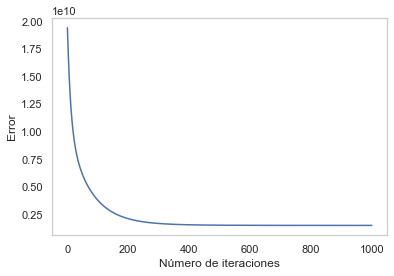

In [41]:
error_change(yy)

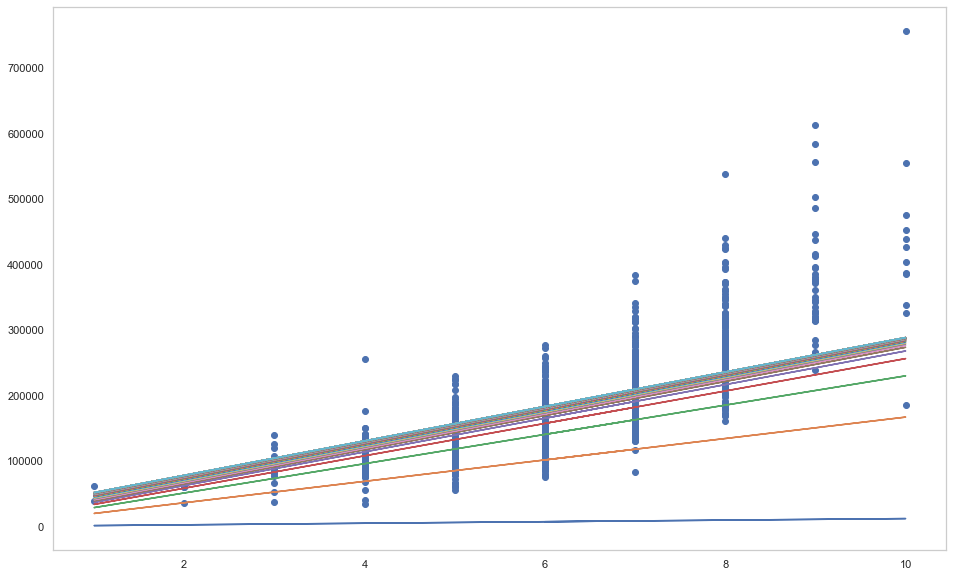

In [42]:
evolution(xx,20,x_1)

### Modelo para $x_2$

In [44]:
xx_2,yy = trainlinearmodel(x_2,y,10000,100,0.00000005)

Iteración1 Error=19409722053.22
Iteración101 Error=10586734180.97
Iteración201 Error=10485958831.68
Iteración301 Error=10386354394.58
Iteración401 Error=10287905388.90
Iteración501 Error=10190598465.57
Iteración601 Error=10094420429.46
Iteración701 Error=9999358237.61
Iteración801 Error=9905398997.44
Iteración901 Error=9812529965.02
Iteración1001 Error=9720738543.37
Iteración1101 Error=9630012280.76
Iteración1201 Error=9540338869.05
Iteración1301 Error=9451706142.00
Iteración1401 Error=9364102073.70
Iteración1501 Error=9277514776.87
Iteración1601 Error=9191932501.34
Iteración1701 Error=9107343632.43
Iteración1801 Error=9023736689.39
Iteración1901 Error=8941100323.86
Iteración2001 Error=8859423318.38
Iteración2101 Error=8778694584.81
Iteración2201 Error=8698903162.90
Iteración2301 Error=8620038218.82
Iteración2401 Error=8542089043.64
Iteración2501 Error=8465045051.97
Iteración2601 Error=8388895780.48
Iteración2701 Error=8313630886.52
Iteración2801 Error=8239240146.72
Iteración2901 Error

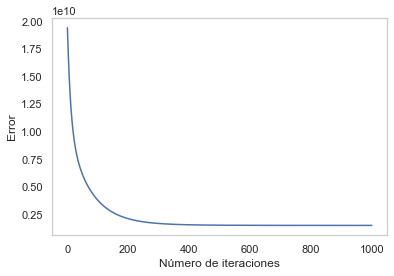

In [43]:
error_change(yy)

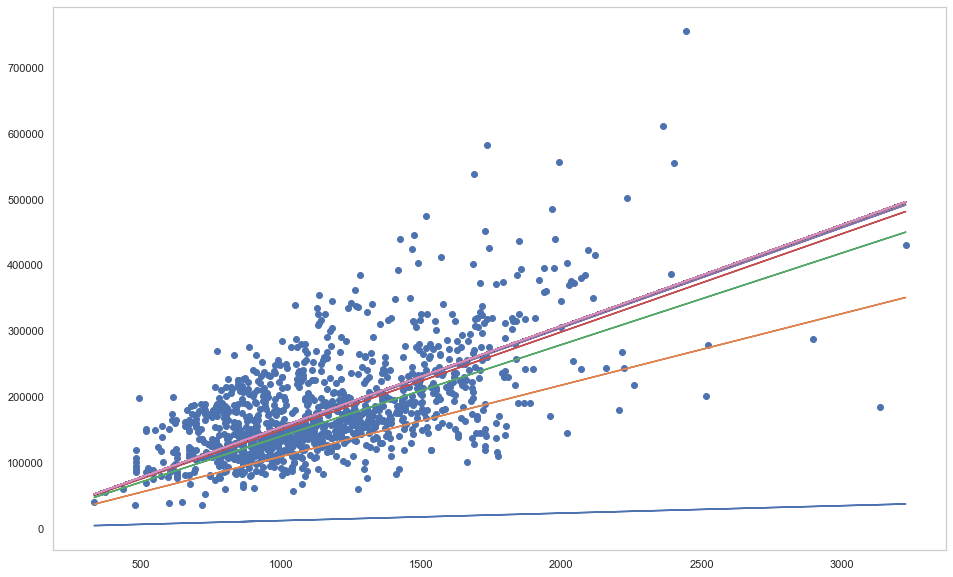

In [45]:
evolution(xx_2,15,x_2)

### Uso de Scikit-Learn para creación de modelos

### Modelo Scikit para $x_1$

In [21]:
reglinx_1 = LinearRegression().fit(x_1,y)
reglinx_1.coef_, reglinx_1.intercept_

(array([[45411.99877916]]), array([-96469.57131874]))

### Modelo Scikit para $x_2$

In [22]:
reglinx_2 = LinearRegression().fit(x_2,y)
reglinx_2.coef_, reglinx_2.intercept_

(array([[129.95124229]]), array([30324.58517496]))

In [46]:
def prediction(iterations,reglinx,x):
    model = max(list(iterations.keys()))
    y_hat_i = np.array(iterations[model][0][0] * x + iterations[model][1][1])
    regliny_hat = reglinx.predict(x)
    y_hat_avg = (y_hat_i+regliny_hat)/2
    
    return y_hat_i, regliny_hat, y_hat_avg 

In [24]:
t_1 = np.expand_dims(x_test_data[:,0],1)
t_2 = np.expand_dims(x_test_data[:,1],1)
yt = np.expand_dims(y_test_data,1)

In [47]:
y_hat_i_x_1,regliny_hat_x_1,y_hat_avg_x_1 = prediction(xx,reglinx_1,t_1)
y_hat_i_x_2,regliny_hat_x_2,y_hat_avg_x_2 = prediction(xx_2,reglinx_2,t_2)

### Calculando error de los datos de prueba

In [48]:
def errortestdata(yit,yreg,yr):
    erroryit = 1/2*(np.mean((yit-yt)**2))
    erroryreg = 1/2*(np.mean((yreg-yt)**2))
    
    return erroryit,erroryreg
    
    
    

In [49]:
error_model_x1i,error_model_x1r = errortestdata(y_hat_i_x_1,regliny_hat_x_1,yt)
error_model_x2i,error_model_x2r = errortestdata(y_hat_i_x_2,regliny_hat_x_2,yt)

In [50]:
error_model_x2i,error_model_x2r

(2436877604.266213, 2292769137.3459373)

### Graficando errores

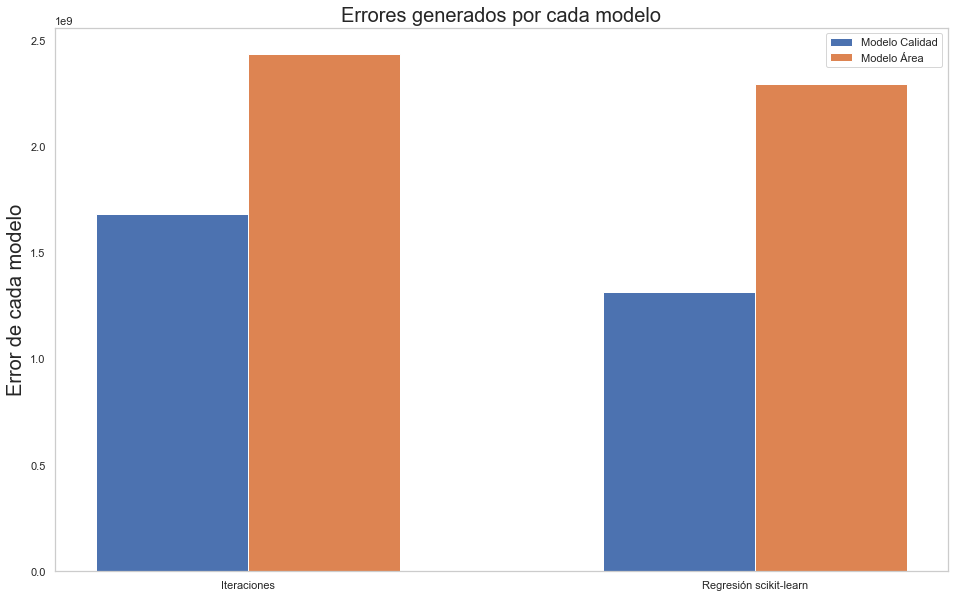

In [51]:
labels = ['Iteraciones','Regresión scikit-learn']
error_iterations = [error_model_x1i,error_model_x1r]
error_reg = [error_model_x2i,error_model_x2r]
sns.set_style("whitegrid", {'axes.grid' : False})
loc = np.arange(len(labels))  
width = 0.3
fig, ax = plt.subplots(figsize=(16, 10))
labmod1 = ax.bar(loc - width/2, error_iterations, width, label='Modelo Calidad')
labmod2 = ax.bar(loc + width/2, error_reg, width, label='Modelo Área')

ax.set_ylabel('Error de cada modelo',size=20)
ax.set_title('Errores generados por cada modelo',size=20)
ax.set_xticks(loc)
ax.set_xticklabels(labels)

ax.legend()








Se puede concluir que el modelo $x_1$ para "calida general de casa" lo mejor sería el mejor modelo para utilizar en la predicción del costo de las casas, debido a que en el análisis de contraste de errores, en ambas modalidades mostró errores más pequeños respecto a la variable $x_2$. También se puede concluir que bajo el entrenamiento de optimización de parámetros y scikit-learn, hay poca diferencia respecto a los errores de cada forma de entrenamiento. 